# Importacion de las librerias

In [2]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import check_random_state
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
rs = check_random_state(4421)


In [4]:
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

In [5]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import pingouin as pg
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [7]:
import matplotlib.pyplot as plt
from sklearn.base import clone
from itertools import combinations

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [11]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import scipy.stats as st

# Carga de los datos

In [12]:
data = pd.read_csv("../content/games.csv")

In [13]:
data.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


# Transformacion de los datos

Datos en dos dataset, uno para cada equipo. Esto para luego unir los dos dataset pero renombrando las variables

In [14]:
partidasT1 = data[['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','t1_towerKills','t1_inhibitorKills','t1_baronKills','t1_dragonKills','t1_riftHeraldKills','winner']]
partidasT2 = data[['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','t2_towerKills','t2_inhibitorKills','t2_baronKills','t2_dragonKills','t2_riftHeraldKills','winner']]
partidasT1['winner'] = partidasT1['winner'].replace({2: 0}, regex=True)
partidasT2['winner'] = partidasT2['winner'].replace({1: 0}, regex=True)
partidasT2['winner'] = partidasT2['winner'].replace({2: 1}, regex=True)

partidasT2['firstBlood'] = partidasT2['firstBlood'].replace({2: 3}, regex=True)
partidasT2['firstBlood'] = partidasT2['firstBlood'].replace({1: 2}, regex=True)
partidasT2['firstBlood'] = partidasT2['firstBlood'].replace({3: 1}, regex=True)

partidasT2['firstTower'] = partidasT2['firstTower'].replace({2: 3}, regex=True)
partidasT2['firstTower'] = partidasT2['firstTower'].replace({1: 2}, regex=True)
partidasT2['firstTower'] = partidasT2['firstTower'].replace({3: 1}, regex=True)

partidasT2['firstInhibitor'] = partidasT2['firstInhibitor'].replace({2: 3}, regex=True)
partidasT2['firstInhibitor'] = partidasT2['firstInhibitor'].replace({1: 2}, regex=True)
partidasT2['firstInhibitor'] = partidasT2['firstInhibitor'].replace({3: 1}, regex=True)

partidasT2['firstBaron'] = partidasT2['firstBaron'].replace({2: 3}, regex=True)
partidasT2['firstBaron'] = partidasT2['firstBaron'].replace({1: 2}, regex=True)
partidasT2['firstBaron'] = partidasT2['firstBaron'].replace({3: 1}, regex=True)

partidasT2['firstDragon'] = partidasT2['firstDragon'].replace({2: 3}, regex=True)
partidasT2['firstDragon'] = partidasT2['firstDragon'].replace({1: 2}, regex=True)
partidasT2['firstDragon'] = partidasT2['firstDragon'].replace({3: 1}, regex=True)

partidasT2['firstRiftHerald'] = partidasT2['firstRiftHerald'].replace({2: 3}, regex=True)
partidasT2['firstRiftHerald'] = partidasT2['firstRiftHerald'].replace({1: 2}, regex=True)
partidasT2['firstRiftHerald'] = partidasT2['firstRiftHerald'].replace({3: 1}, regex=True)

Union de los datos en un solo dataset con renombramiento de las variables para asignarles el mismo nombre, solo que ya se sabe de que equipo son

In [15]:
partidasT1.columns = ['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','towerKills' ,'inhibitorKills','baronKills','dragonKills','riftHeraldKills','winner']
partidasT2.columns = ['gameDuration','firstBlood','firstTower','firstInhibitor','firstBaron','firstDragon','firstRiftHerald','towerKills' ,'inhibitorKills','baronKills','dragonKills','riftHeraldKills','winner']
partidas= pd.concat([partidasT1,partidasT2],axis=0)


Para facilidad en el manejo, se transformaran el tiempo de la duracion de la partida de segundos a minutos

In [16]:
partidas.index = pd.RangeIndex(len(partidas.index))
partidas['gameDuration'] = (partidas.gameDuration/60).astype(int)


In [17]:
partidas.head()

,gameDuration,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,firstRiftHerald,towerKills,inhibitorKills,baronKills,dragonKills,riftHeraldKills,winner
0,32,2,1,1,1,1,2,11,1,2,3,0,1
1,30,1,1,1,0,1,1,10,4,0,2,1,1
2,24,2,1,1,1,2,0,8,1,1,1,0,1
3,29,1,1,1,1,1,0,9,2,1,2,0,1
4,34,2,1,1,1,1,0,9,2,1,3,0,1


Analisis de los datos

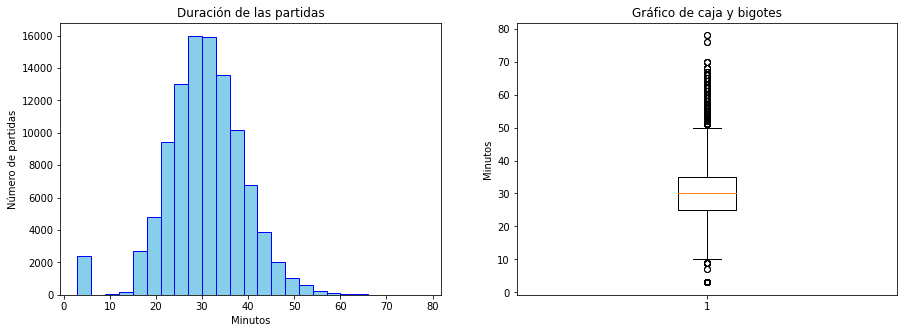

count    102980.000000
mean         30.057798
std           8.521393
min           3.000000
25%          25.000000
50%          30.000000
75%          35.000000
max          78.000000
Name: gameDuration, dtype: float64

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(partidas["gameDuration"],bins =25,color = "skyblue",edgecolor='blue',linewidth=1)
plt.xlabel('Minutos')
plt.ylabel('Número de partidas')
plt.title('Duración de las partidas')
plt.subplot(122)
plt.ylabel('Minutos')
plt.title('Gráfico de caja y bigotes')
plt.boxplot(partidas["gameDuration"])
plt.show()
partidas["gameDuration"].describe()

In [19]:
partidas['gameDuration'] = np.where(partidas['gameDuration']<25,1,np.where(((partidas['gameDuration']>24)&(partidas['gameDuration']<36)),2,3))

In [20]:
killsWinner = partidas.drop(partidas[partidas.loc[:, 'winner'] == 0].index)
killsWinner.index = pd.RangeIndex(len(killsWinner.index))
LoserKills = partidas.drop(partidas[partidas.loc[:, 'winner'] == 1].index)
LoserKills.index = pd.RangeIndex(len(LoserKills.index))

In [21]:
firstBloodfi = killsWinner.firstBlood.value_counts()/killsWinner.firstBlood.count()
firstBloodfi =firstBloodfi.to_frame()
firstBloodfi['index'] = firstBloodfi.index

firstTowerfi = killsWinner.firstTower.value_counts()/killsWinner.firstTower.count()
firstTowerfi =firstTowerfi.to_frame()
firstTowerfi['index'] = firstTowerfi.index

firstInhibitorfi = killsWinner.firstInhibitor.value_counts()/killsWinner.firstInhibitor.count()
firstInhibitorfi =firstInhibitorfi.to_frame()
firstInhibitorfi['index'] = firstInhibitorfi.index

firstBaronfi = killsWinner.firstBaron.value_counts()/killsWinner.firstBaron.count()
firstBaronfi =firstBaronfi.to_frame()
firstBaronfi['index'] = firstBaronfi.index


firstDragonfi = killsWinner.firstDragon.value_counts()/killsWinner.firstDragon.count()
firstDragonfi =firstDragonfi.to_frame()
firstDragonfi['index'] = firstDragonfi.index

firstRiftHeraldfi = killsWinner.firstRiftHerald.value_counts()/killsWinner.firstRiftHerald.count()
firstRiftHeraldfi =firstRiftHeraldfi.to_frame()
firstRiftHeraldfi['index'] = firstRiftHeraldfi.index


inhibitorKillsfi = killsWinner.inhibitorKills.value_counts()/killsWinner.inhibitorKills.count()
inhibitorKillsfi =inhibitorKillsfi.to_frame()
inhibitorKillsfi['index'] = inhibitorKillsfi.index

towerKillsfi = killsWinner.towerKills.value_counts()/killsWinner.towerKills.count()
towerKillsfi =towerKillsfi.to_frame()
towerKillsfi['index'] = towerKillsfi.index

baronKillsfi = killsWinner.baronKills.value_counts()/killsWinner.baronKills.count()
baronKillsfi =baronKillsfi.to_frame()
baronKillsfi['index'] = baronKillsfi.index


dragonKillsfi =killsWinner.dragonKills.value_counts()/killsWinner.dragonKills.count()
dragonKillsfi =dragonKillsfi.to_frame()
dragonKillsfi['index'] = dragonKillsfi.index


riftHeraldKillsfi =killsWinner.riftHeraldKills.value_counts()/killsWinner.riftHeraldKills.count()
riftHeraldKillsfi =riftHeraldKillsfi.to_frame()
riftHeraldKillsfi['index'] = riftHeraldKillsfi.index


In [22]:
inhibitorKillsfi2 = LoserKills.inhibitorKills.value_counts()/LoserKills.inhibitorKills.count()
inhibitorKillsfi2 =inhibitorKillsfi2.to_frame()
inhibitorKillsfi2['index'] = inhibitorKillsfi2.index

towerKillsfi2 = LoserKills.towerKills.value_counts()/LoserKills.towerKills.count()
towerKillsfi2 =towerKillsfi2.to_frame()
towerKillsfi2['index'] = towerKillsfi2.index

baronKillsfi2 = LoserKills.baronKills.value_counts()/LoserKills.baronKills.count()
baronKillsfi2 =baronKillsfi2.to_frame()
baronKillsfi2['index'] = baronKillsfi2.index


dragonKillsfi2 =LoserKills.dragonKills.value_counts()/LoserKills.dragonKills.count()
dragonKillsfi2 =dragonKillsfi2.to_frame()
dragonKillsfi2['index'] = dragonKillsfi2.index


riftHeraldKillsfi2 =LoserKills.riftHeraldKills.value_counts()/LoserKills.riftHeraldKills.count()
riftHeraldKillsfi2 =riftHeraldKillsfi2.to_frame()
riftHeraldKillsfi2['index'] = riftHeraldKillsfi2.index


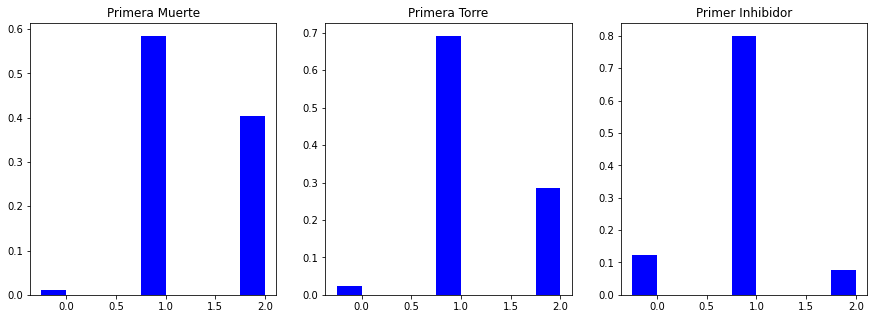

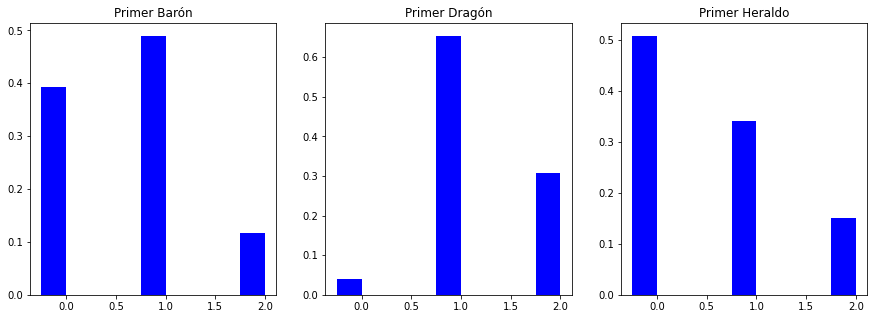

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(131).set_title('Primera Muerte')
plt.bar(firstBloodfi.index-0.125,firstBloodfi.firstBlood,width = 0.25,color='blue')
plt.subplot(132).set_title('Primera Torre')
plt.bar(firstTowerfi.index-0.125,firstTowerfi.firstTower,width = 0.25,color='blue')
plt.subplot(133).set_title('Primer Inhibidor')
plt.bar(firstInhibitorfi.index-0.125,firstInhibitorfi.firstInhibitor,width = 0.25,color='blue')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(131).set_title('Primer Barón')
plt.bar(firstBaronfi.index-0.125,firstBaronfi.firstBaron,width = 0.25,color='blue')
plt.subplot(132).set_title('Primer Dragón')
plt.bar(firstDragonfi.index-0.125,firstDragonfi.firstDragon,width = 0.25,color='blue')
plt.subplot(133).set_title('Primer Heraldo')
plt.bar(firstRiftHeraldfi.index-0.125,firstRiftHeraldfi.firstRiftHerald,width = 0.25,color='blue')
plt.show()

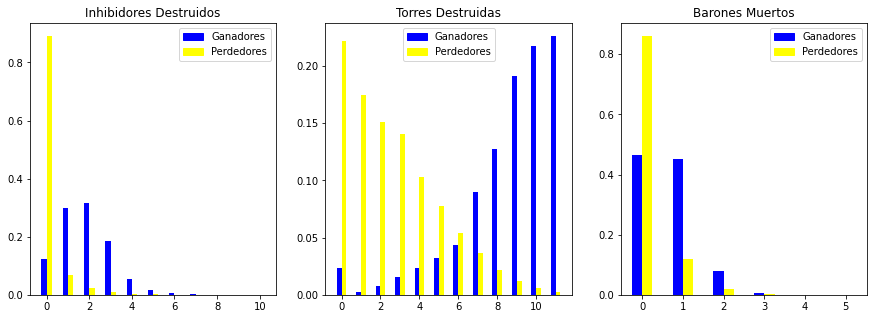

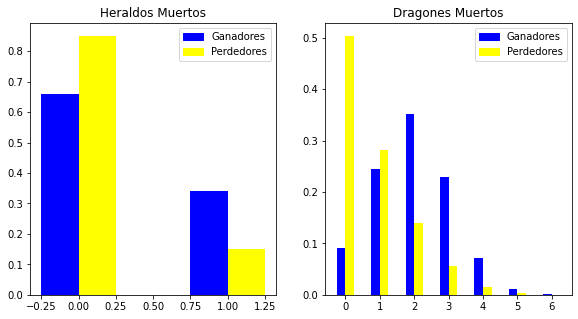

In [24]:
plt.figure(figsize=(15, 5))
plt.subplot(131).set_title('Inhibidores Destruidos')
blue_legend = mpatches.Patch(color='blue', label='Ganadores')
yellow_legend = mpatches.Patch(color='yellow', label='Perdedores')
plt.legend(handles=[blue_legend,yellow_legend])
plt.bar(inhibitorKillsfi.index-0.125,inhibitorKillsfi.inhibitorKills,width = 0.25,color='blue')
plt.bar(inhibitorKillsfi2.index+0.125,inhibitorKillsfi2.inhibitorKills,width = 0.25,color='yellow')
plt.subplot(132).set_title('Torres Destruidas')
plt.legend(handles=[blue_legend,yellow_legend])
plt.bar(towerKillsfi.index-0.125,towerKillsfi.towerKills,width = 0.25,color='blue')
plt.bar(towerKillsfi2.index+0.125,towerKillsfi2.towerKills,width = 0.25,color='yellow')
plt.subplot(133).set_title('Barones Muertos')
plt.legend(handles=[blue_legend,yellow_legend])
plt.bar(baronKillsfi.index-0.125,baronKillsfi.baronKills,width = 0.25,color='blue')
plt.bar(baronKillsfi2.index+0.125,baronKillsfi2.baronKills,width = 0.25,color='yellow')
plt.show()
plt.figure(figsize=(15, 5))
plt.subplot(131).set_title('Heraldos Muertos')
plt.legend(handles=[blue_legend,yellow_legend])
plt.bar(riftHeraldKillsfi.index-0.125,riftHeraldKillsfi.riftHeraldKills,width = 0.25,color='blue')
plt.bar(riftHeraldKillsfi2.index+0.125,riftHeraldKillsfi2.riftHeraldKills,width = 0.25,color='yellow')
plt.subplot(132).set_title('Dragones Muertos')
plt.legend(handles=[blue_legend,yellow_legend])
plt.bar(dragonKillsfi.index-0.125,dragonKillsfi.dragonKills,width = 0.25,color='blue')
plt.bar(dragonKillsfi2.index+0.125,dragonKillsfi2.dragonKills,width = 0.25,color='yellow')
plt.show()

MATRIZ DE CONFUSION, (USA PEARSEON)

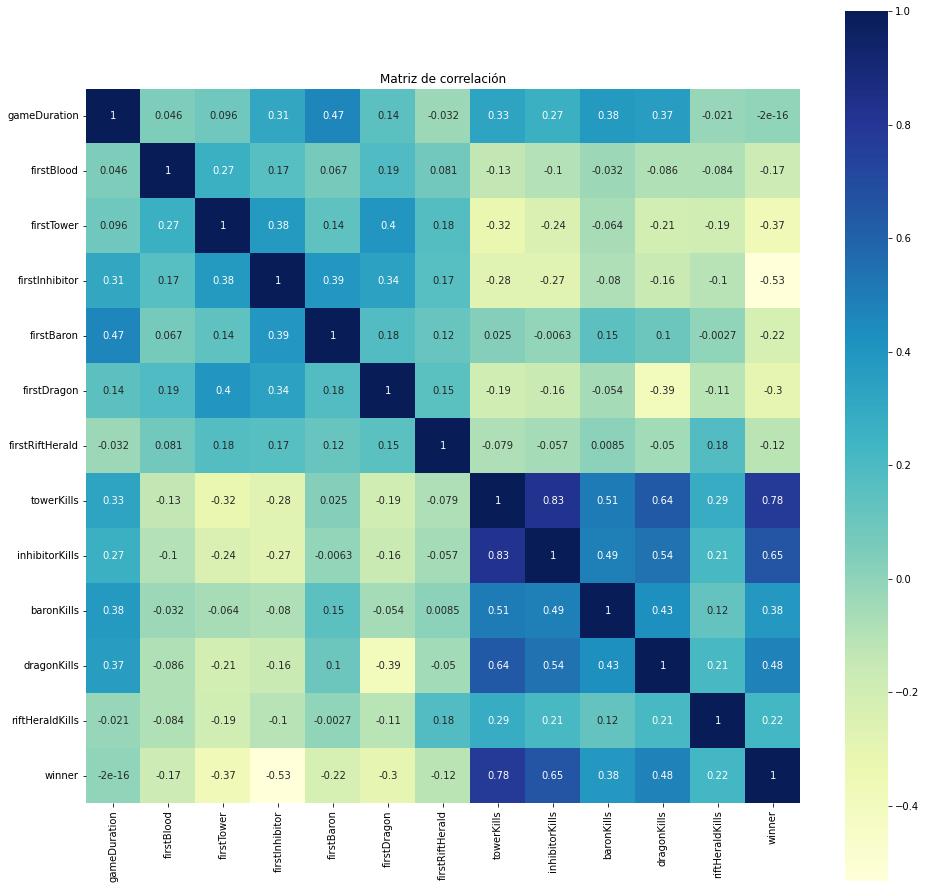

In [25]:
plt.figure(figsize=(16, 16))
plt.title('Matriz de correlación')
sns.heatmap(partidas.corr(), square=True, annot=True,cmap="YlGnBu")

# Analisis Individual de cada una de las caracteristicas

gameDuration

In [88]:
display(pg.corr(partidas['gameDuration'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['gameDuration'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['gameDuration'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,0.0,"[-0.01, 0.01]",1.0,0.004,0.05


,n,r,CI95%,p-val,power
spearman,102980,0.0,"[-0.01, 0.01]",1.0,0.05


,n,r,CI95%,p-val,power
kendall,102980,0.0,"[-0.01, 0.01]",1.0,0.05


firstBlood

In [78]:
display(pg.corr(partidas['firstBlood'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['firstBlood'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['firstBlood'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,-0.172992,"[-0.18, -0.17]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,-0.177325,"[-0.18, -0.17]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,-0.176406,"[-0.18, -0.17]",0.0,1.0


firstTower

In [79]:
display(pg.corr(partidas['firstTower'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['firstTower'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['firstTower'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,-0.373777,"[-0.38, -0.37]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,-0.392557,"[-0.4, -0.39]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,-0.388317,"[-0.39, -0.38]",0.0,1.0


firstInhibitor

In [80]:
display(pg.corr(partidas['firstInhibitor'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['firstInhibitor'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['firstInhibitor'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,-0.531953,"[-0.54, -0.53]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,-0.602937,"[-0.61, -0.6]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,-0.578828,"[-0.58, -0.57]",0.0,1.0


firstBaron

In [81]:
display(pg.corr(partidas['firstBaron'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['firstBaron'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['firstBaron'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,-0.224237,"[-0.23, -0.22]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,-0.208003,"[-0.21, -0.2]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,-0.19629,"[-0.2, -0.19]",0.0,1.0


firstDragon

In [82]:
display(pg.corr(partidas['firstDragon'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['firstDragon'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['firstDragon'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,-0.304347,"[-0.31, -0.3]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,-0.327125,"[-0.33, -0.32]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,-0.32161,"[-0.33, -0.32]",0.0,1.0


firstRiftHerald

In [83]:
display(pg.corr(partidas['firstRiftHerald'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['firstRiftHerald'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['firstRiftHerald'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,-0.11556,"[-0.12, -0.11]",5.046901e-303,1.642e+298,1.0


,n,r,CI95%,p-val,power
spearman,102980,-0.088925,"[-0.09, -0.08]",8.230287e-180,1.0


,n,r,CI95%,p-val,power
kendall,102980,-0.08441,"[-0.09, -0.08]",4.097501e-179,1.0


towerKills

In [84]:
display(pg.corr(partidas['towerKills'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['towerKills'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['towerKills'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,0.778747,"[0.78, 0.78]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,0.761447,"[0.76, 0.76]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,0.6489,"[0.65, 0.65]",0.0,1.0


inhibitorKills

In [85]:
display(pg.corr(partidas['inhibitorKills'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['inhibitorKills'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['inhibitorKills'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,0.654966,"[0.65, 0.66]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,0.745436,"[0.74, 0.75]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,0.688708,"[0.69, 0.69]",0.0,1.0


dragonKills

In [86]:
display(pg.corr(partidas['dragonKills'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['dragonKills'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['dragonKills'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,0.484778,"[0.48, 0.49]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,0.506724,"[0.5, 0.51]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,0.459644,"[0.45, 0.46]",0.0,1.0


riftHeraldKills

In [87]:
display(pg.corr(partidas['riftHeraldKills'], partidas['winner'], method='pearson'))
display(pg.corr(partidas['riftHeraldKills'], partidas['winner'], method='spearman'))
display(pg.corr(partidas['riftHeraldKills'], partidas['winner'], method='kendall'))

,n,r,CI95%,p-val,BF10,power
pearson,102980,0.222178,"[0.22, 0.23]",0.0,inf,1.0


,n,r,CI95%,p-val,power
spearman,102980,0.222178,"[0.22, 0.23]",0.0,1.0


,n,r,CI95%,p-val,power
kendall,102980,0.222178,"[0.22, 0.23]",0.0,1.0


# MODELOS

Particion en datos de entrenamiento y testeo

In [26]:
X = partidas.drop(['winner'], axis=1)
Y = partidas['winner']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.25, random_state=rs)

Normalizacion de los datos

In [27]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(X = Xtrain)
Xtest = scaler.transform(X = Xtest)

**GRADIENT BOOSTING**

In [ ]:
rango = range(1,200)
score = 0
precisiones = []
for estimadores in rango:
    gbr = GradientBoostingRegressor(n_estimators = estimadores,max_depth=7,min_samples_split=3,min_samples_leaf=2,max_features=2,random_state=rs)
    gbr.fit(Xtrain,Ytrain)
    prediccion = gbr.predict(Xtest)
    accuracy_test = accuracy_score(Ytest,prediccion.round())
    if (score < accuracy_test):
        Y_pred = prediccion
        score = accuracy_test
        pos = estimadores
    precisiones.insert(estimadores,accuracy_test)
print("precisión de predicción: {0: .3f}".format(score))
print("n_estimators: " +format(pos))

precisión de predicción:  0.952
n_estimators: 163


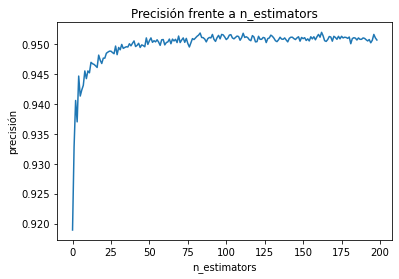

In [ ]:
plt.title('Precisión frente a n_estimators')
plt.ylabel('precisión')
plt.xlabel('n_estimators')
plt.plot(precisiones)

In [ ]:
print('Accuracy', accuracy_score(Ytest, prediccion.round() ))
print('Recall', recall_score(Ytest,prediccion.round() ))
print('PRecision', precision_score(Ytest,prediccion.round() ))

Accuracy 0.9506700330161196
Recall 0.9719271035284994
PRecision 0.9324455025667733


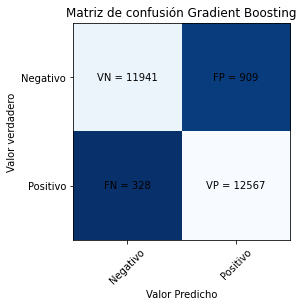

In [ ]:
confusion = confusion_matrix(Ytest, Y_pred.round())
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues_r)
classNames = ['Negativo','Positivo']
plt.title('Matriz de confusión Gradient Boosting')
plt.ylabel('Valor verdadero')
plt.xlabel('Valor Predicho')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['VN','FP'], ['FN', 'VP']]
s = [['VN','FP'], ['FN', 'VP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), horizontalalignment='center', verticalalignment='center')
plt.show()

Intervalo de confianza

In [ ]:
print(st.t.interval(alpha=0.90, df=len(prediccion.round())-1,
              loc=np.mean(prediccion.round()),
              scale=st.sem(prediccion.round())))

(0.5169610030428327, 0.5272029122805311)


**Máquinas de Soporte Vectorial**

In [ ]:
modelo = SVC(C = 100, kernel = 'poly', random_state=123)
modelo.fit(Xtrain, Ytrain)

SVC(C=100, kernel='poly', random_state=123)

In [ ]:
Ypredichito = modelo.predict(Xtest)

In [ ]:
print('Accuracy', accuracy_score(Ytest,Ypredichito ))
print('Recall', recall_score(Ytest,Ypredichito ))
print('Precision', precision_score(Ytest,Ypredichito ))

Accuracy 0.9500485531171101
Recall 0.9740984877859635
Precision 0.9295493228742692


In [ ]:
svc_lin = svm.SVC(kernel='linear')
sv.plot_estimator(svc_lin, Xtrain, Ytrain)
plt.scatter(svc_lin.support_vectors_[:, 0], svc_lin.support_vectors_[:, 1], 
            s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel lineal')

svc_poly = svm.SVC(kernel='poly', degree=3)
sv.plot_estimator(svc_poly, Xtrain, Ytrain)
plt.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel polinomial de grado 3')

svc_poly = svm.SVC(kernel='poly', degree=7)
sv.plot_estimator(svc_poly, Xtrain, Ytrain)
plt.scatter(svc_poly.support_vectors_[:, 0], svc_poly.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel polinomial de grado 7')

svc_rbf = svm.SVC(kernel='rbf', gamma=1e2)
sv.plot_estimator(svc_rbf, Xtrain, Ytrain)
plt.scatter(svc_rbf.support_vectors_[:, 0], svc_rbf.support_vectors_[:, 1], 
           s=80, facecolors='none', edgecolors='black', linewidths=2, zorder=10)
plt.title('Kernel Gaussiano o RBF')

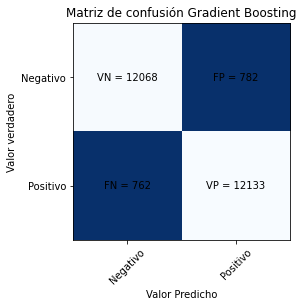

In [ ]:
confusion = confusion_matrix(Ytest, Ypredichito)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues_r)
classNames = ['Negativo','Positivo']
plt.title('Matriz de confusión Gradient Boosting')
plt.ylabel('Valor verdadero')
plt.xlabel('Valor Predicho')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['VN','FP'], ['FN', 'VP']]
s = [['VN','FP'], ['FN', 'VP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), horizontalalignment='center', verticalalignment='center')
plt.show()

Intervalo de confianza

In [ ]:
print(st.t.interval(alpha=0.90, df=len(Ypredichito)-1,
              loc=np.mean(Ypredichito),
              scale=st.sem(Ypredichito)))

(0.5197590104924469, 0.5299982239220026)


**Análisis Discriminante Cuadrático**

In [ ]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(Xtrain, Ytrain)

QuadraticDiscriminantAnalysis()

In [ ]:
Ypredicho = clf.predict(Xtest)

In [ ]:
print('Accuracy', accuracy_score(Ytest,Ypredicho ))
print('Recall', recall_score(Ytest,Ypredicho ))
print('Precision', precision_score(Ytest,Ypredicho ))

Accuracy 0.9346280831229364
Recall 0.9481969755719271
Precision 0.9233499471378945


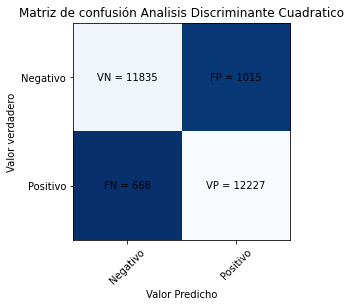

In [ ]:
confusion = confusion_matrix(Ytest, Ypredicho)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues_r)
classNames = ['Negativo','Positivo']
plt.title('Matriz de confusión Analisis Discriminante Cuadratico')
plt.ylabel('Valor verdadero')
plt.xlabel('Valor Predicho')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['VN','FP'], ['FN', 'VP']]
s = [['VN','FP'], ['FN', 'VP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), horizontalalignment='center', verticalalignment='center')
plt.show()

Intervalo de confianza

In [ ]:
print(st.t.interval(alpha=0.90, df=len(Ypredicho)-1,
              loc=np.mean(Ypredicho),
              scale=st.sem(Ypredicho)))

(0.5092284576066087, 0.5194761452288933)


**Redes Neuronales Artificiales**

In [ ]:
modelito = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
modelito.fit(Xtrain, Ytrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
Ypredijida = modelito.predict(Xtest)

In [ ]:
print('Accuracy', accuracy_score(Ytest,Ypredijida ))
print('Recall', recall_score(Ytest,Ypredijida ))
print('Precision', precision_score(Ytest,Ypredijida ))

Accuracy 0.949621285686541
Recall 0.9699108181465684
Precision 0.9322450805008945


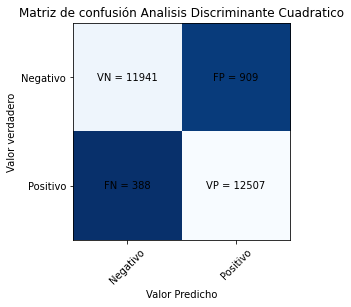

In [ ]:
confusion = confusion_matrix(Ytest, Ypredijida)
plt.clf()
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues_r)
classNames = ['Negativo','Positivo']
plt.title('Matriz de confusión Redes Neuronales')
plt.ylabel('Valor verdadero')
plt.xlabel('Valor Predicho')

tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['VN','FP'], ['FN', 'VP']]
s = [['VN','FP'], ['FN', 'VP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+" = "+str(confusion[i][j]), horizontalalignment='center', verticalalignment='center')
plt.show()

Intervalo de confianza

In [ ]:
print(st.t.interval(alpha=0.90, df=len(Ypredichito)-1,
              loc=np.mean(Ypredichito),
              scale=st.sem(Ypredichito)))

(0.5197590104924469, 0.5299982239220026)


# **SELECCION DE CARACTERISTICAS POR SBS DE LOS 3 MEJORES MODELOS**

In [28]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = 1
        return score


Para Gradient Boosting


In [29]:
reg = GradientBoostingRegressor(random_state=0)

In [ ]:
sbs = SBS(reg, k_features=1)
sbs.fit(Xtrain, Ytrain)

In [ ]:
sbs.subsets_

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]

In [ ]:
k5 = list(sbs.subsets_[8])
print('5 caracteristicas principales seleccionadas:\n', partidas.columns[1:][k5])


In [ ]:
reg.fit(Xtrain, Ytrain)
print('\nDesempeño utilizando todas las caracteristicas:\n')
print('Training accuracy:', reg.score(Xtrain, Ytrain))
print('Test accuracy:', reg.score(Xtest, Ytest))

In [ ]:
reg.fit(Xtrain[:, k5], Ytrain)
print('\nDesempeño usando  las 5 caracteristicas principales seleccionadas:\n')
print('Training accuracy:', reg.score(Xtrain[:, k5], Ytrain))
print('Test accuracy:', reg.score(Xtest[:, k5], Ytest))

Para RNA

In [31]:
modelito = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)


In [32]:
sbsRNA = SBS(modelito, k_features=1)
sbsRNA.fit(Xtrain, Ytrain)

In [39]:
k_feat = [len(k) for k in sbs.subsets_]

In [51]:
k5RNA = list(sbsRNA.subsets_[8])
print('caracteristicas principales seleccionadas:\n', partidas.columns[1:][k5RNA])

caracteristicas principales seleccionadas:
 Index(['firstBlood', 'firstTower', 'firstInhibitor', 'firstBaron'], dtype='object')


In [53]:
modelito.fit(Xtrain, Ytrain)
print('\nDesempeño utilizando todas las caracteristicas:\n')
print('Training accuracy:', modelito.score(Xtrain, Ytrain))
print('Test accuracy:', modelito.score(Xtest, Ytest))


Desempeño utilizando todas las caracteristicas:

Training accuracy: 0.949996763125526
Test accuracy: 0.949621285686541


In [54]:
modelito.fit(Xtrain[:, k5RNA], Ytrain)
print('\nDesempeño usando  las caracteristicas principales seleccionadas:\n')
print('Training accuracy:', modelito.score(Xtrain[:, k5RNA], Ytrain))
print('Test accuracy:', modelito.score(Xtest[:, k5RNA], Ytest))


Desempeño usando  las caracteristicas principales seleccionadas:

Training accuracy: 0.8920049200492005
Test accuracy: 0.8973392891823655


Para Maquinas de Soporte Vectorial

In [148]:
modelo = SVC(C = 100, kernel = 'poly', random_state=123)


In [ ]:
sbsMaq = SBS(modelo, k_features=1)
sbsMaq.fit(Xtrain, Ytrain)

In [ ]:
k_feat = [len(k) for k in sbs.subsets_]

In [ ]:
k5Maq = list(sbs.subsets_[8])
print('5 caracteristicas principales seleccionadas:\n', partidas.columns[1:][k5Maq])

In [ ]:
modelo.fit(Xtrain, Ytrain)
print('\nDesempeño utilizando todas las caracteristicas:\n')
print('Training accuracy:', modelo.score(Xtrain, Ytrain))
print('Test accuracy:', modelo.score(Xtest, Ytest))

In [ ]:
modelo.fit(Xtrain[:, k5Maq], Ytrain)
print('\nDesempeño usando  las 5 caracteristicas principales seleccionadas:\n')
print('Training accuracy:', modelo.score(Xtrain[:, k5Maq], Ytrain))
print('Test accuracy:', modelo.score(Xtest[:, k5Maq], Ytest))